# 2.1 Machine Learning with Shallow Neural Networks

It is easier to optimize traditional machine learning models in data-lean settings. They are also more interpretable.

As more data is available, neural networks have an advantage because they retain **flexibility**.

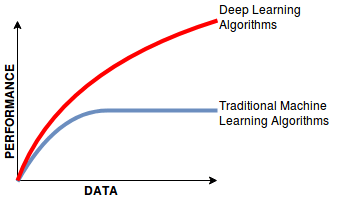

A common way to view deep learning models is as a stacking of simpler models.

Supervised learning: the task of learning a function that maps an input to an output based on example input-output pairs.

Unsupervised learning: self-organized learning that helps find previously unknown patterns in data set without pre-existing labels.

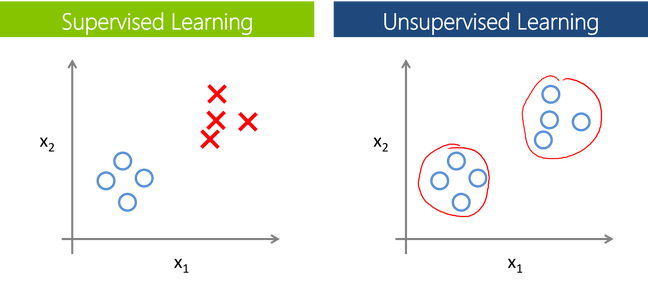

# 2.2 Neural Architectures for Binary Classification Models

Neural architectures vary little from the perceptron model. The main difference is the choice of the activation function in the final layer and the loss function used on the outputs.

Remember that in this section, a single-layer network with $d$ input nodes and a single output node will be used. Coefficients of connections from the $d$ input nodes to the output nodes are denoted by a weight vector $\overline{W} = (w_1, \dots, w_d)$. Also biases are not shown.

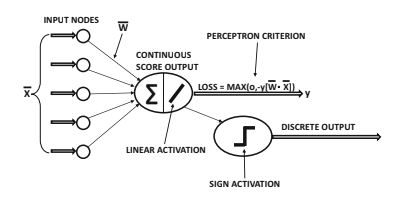

## 2.2.1 Revisiting the Perceptron

Let $(\overline{X}_i, y_i)$ be a training instance, in which the observed value $y_i$ is predicted from the
feature variables $\overline{X}_i$ using the following relationship:

$$\hat{y}_i = \text{sign}(\overline{W} \cdot \overline{X}_i)$$

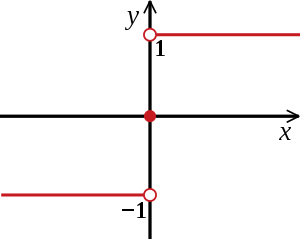

$\overline{W}$ is the weight vector learned by the perceptron through backpropagation. All values with a hat above them like $\hat{y}_i$ are predicted values, not observed values.

**Goal**: Make the difference between the predicted and observed values small

However since we want this to be iterative and approach a solution, the updates to the weight vector are proportional to the difference between the observed and predicted output value.

$$\overline{W} \impliedby \overline{W}(1-\alpha \lambda) + \alpha (y_i - \hat{y}_i) \overline{X}_i \qquad (2.2)$$

Unfortunately, the update to the weight vector and loss function are not consistent, an alternative is 

$$\overline{W} \impliedby \overline{W}(1-\alpha \lambda) + \alpha y_i \overline{X}_i [I(y_i \hat{y}_i < 0)] \qquad (2.3)$$

Updates in this case are only performed when a training instance is misclassified (hence the indicator function).

(2.3) *can be shown* to be consistent with the loss function $L_i$ for the $i^{th}$ instance.

$$L_i = \max\{0, -y_i (\overline{W} \cdot \overline{X}_i)\} = \max\{0, -y_i \hat{y}_i\}$$

This loss function is also known as the *perceptron criterion*.

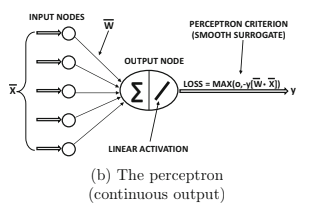

Note that it outputs a continuous range, hence one could extend the architecture of the network.

## 2.2.2 Least-Squares Regression

There are $n$ training pairs of $(\overline{X}_i, y_i)$'s. Each $\overline{X}_i$ is a $d$ dimensional vector and each $y_i$ is a real valued target.

Accordingly the predicted output value is related to the feature variables $\overline{X}_i$'s by the dot product with the weight vector:

$$\hat{y} = \overline{W} \cdot \overline{X}_i$$

Each $\hat{y}_i$ (prediction) is imperfect and therefore has an error term associated with it, namely $e_i$.

$$e_i = (y_i - \hat{y}_i) \qquad \text{observed - predicted... aka residual}$$

In order to get good predictions, one must "teach" $\overline{W}$ the correct $d$ coefficients, so that the total squared error is minimized.

$$ \text{Minimize } \sum_{i=1}^n e_i^2$$

For the $i^{th}$ instance, the error associated with that instance is simply the residual squared for that particular instance, i.e.

$$L_i = e_i^2 = (y_i - \hat{y}_i)^2$$

This architecture is then the same as the perceptron except for this difference in the loss.

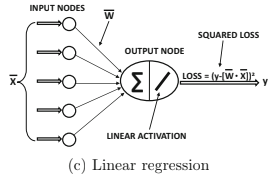

So its nearly identical except that the real-valued errors are used here instead of discrete errors.

The gradient descent steps are then determined by computing the gradient of the residual squared.

$$\frac{\partial e_i^2}{\partial \overline{W}} = -e_i \overline{X}_i \qquad (2.7)$$

And then the updates for the weight vector are computed as follows with a step size determined by $\alpha$:

$$\overline{W} \impliedby \overline{W} + \alpha e_i \overline{X} = \overline{W} + \alpha (y_i - \hat{y}_i) \overline{X}$$

If we add regularization to prevent overfitting, the above equation just gets a penalty on the weight vector determined by a parameter $\lambda$:

$$\overline{W} \impliedby \overline{W} (1- \alpha \cdot \lambda) + \alpha (y_i - \hat{y}_i) \overline{X} \qquad (2.9)$$

This is exactly (2.2), but again, we are using real values here instead of discrete values. 

### 2.2.2.1 Widrow-Hoff Learning

The perceptron algorithm never penalizes a positive class point for $\overline{W} \cdot \overline{X}_i$ being “too correct” (i.e., larger than 1),

However using real-valued predictions to compute the error has the unfortunate effect of penalizing points deemed "too-correct". This inappropriate penalization of over-performance is the Achilles heel of Widrow-Hoff learning and the Fisher discriminant.

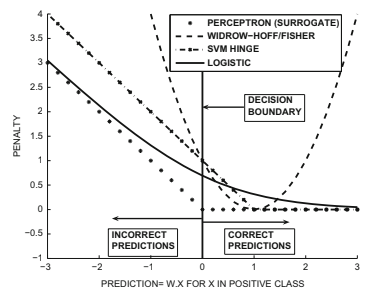

Because Widrow-Hoff uses only binary responses, the loss function can be simplified to:

$$L_i = (1 - \hat{y}_i y_i)^2$$

(2.9) can be re-written for WH Learning as follows:

$$\overline{W} \impliedby \overline{W} (1- \alpha \cdot \lambda) + \alpha y_i (1 - y_i \hat{y}_i) \overline{X} \qquad \text{(only for binary responses)}$$

### 2.2.2.2 Closed Form Solutions

One can solve directly by using the pseudo-inverse of the training data matrix $D$. However it is computationally expensive to invert a large matrix and therefore WH updates are usually preferable as they are more efficient.

## 2.2.3 Logistic Regression

Probabilistic Classifier.

Inherently it uses Maximum-Likelihood Estimation (MAT 316, maybe it was useful) to learn the parameters of the model. We want the predicted probability of the observed class for each training instance to be as large as possible, therefore by taking the negative log we can obtain a minimization. The output is a negative *log-likelihood* which can be used as a loss function.

Using the same set of $n$ training pairs, instantiating $y_i \in \{-1, +1\}$, and applying a soft sigmoid function to $\overline{W} \cdot \overline{X}_i$, one can estimate the probability that $y_i = 1$:

$$\hat{y}_i = P(y_i = 1) = \frac{1}{1 + \text{exp}(-\overline{W} \cdot \overline{X}_i)} \qquad (2.13)$$

Note: $P(y_i = 1) = 0.5$ when $\overline{W} \cdot \overline{X}_i = 0$

<div>
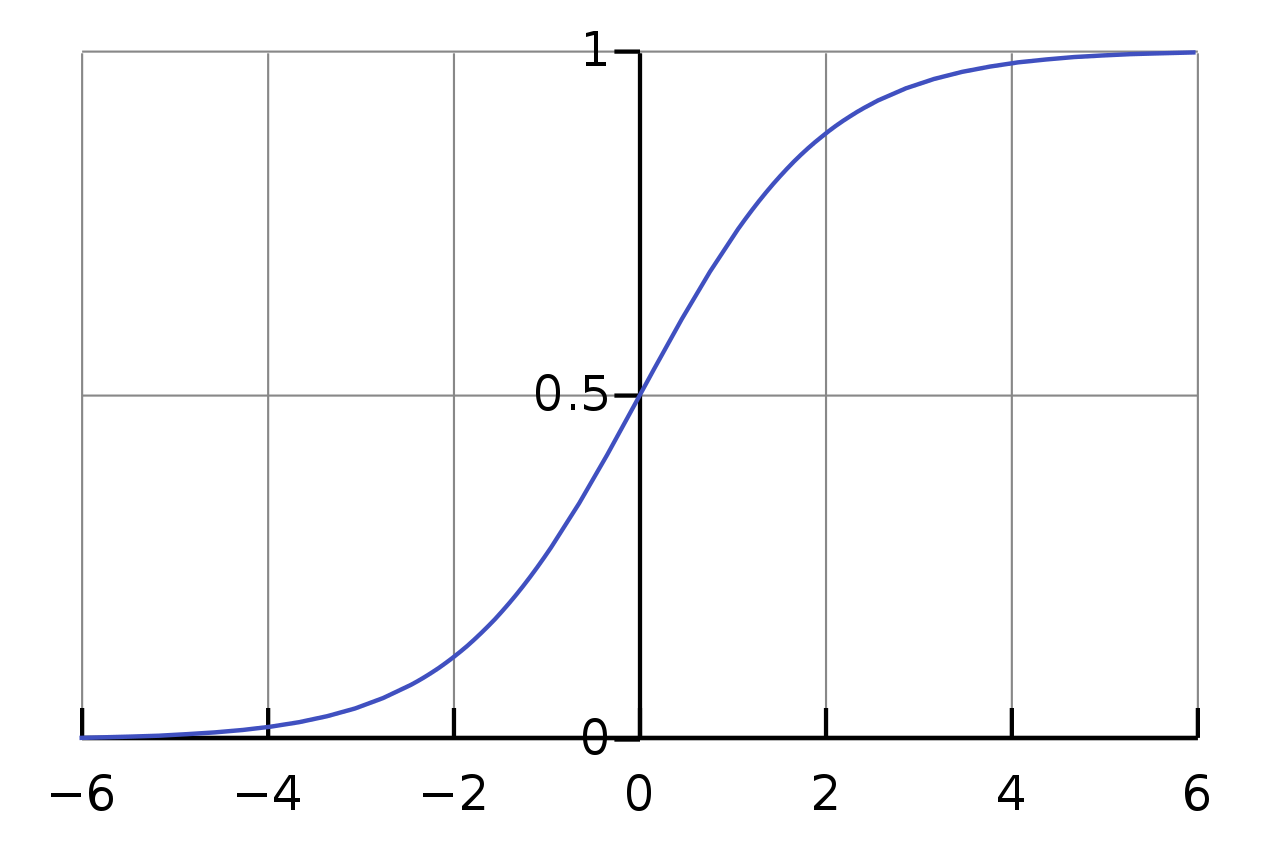
</div>

For positive samples, maximize $P(y_i = 1)$. For negative samples, maximize $P(y_i = -1)$. Therefore, always maximize $|y_i/2 - 0.5 + \hat{y}_i|$

Over all training instances maximize the likelihood $\mathcal{L}$ where

$$\mathcal{L} = \prod_{i=1}^n |y_i/2 - 0.5 + \hat{y}_i| \qquad (2.14)$$

Note this is a product because they are probabilities.

Thus,

$$L_i = -\log(|y_i/2 - 0.5 + \hat{y}_i|)$$

for each training instance.

A simple conversion using the properties of logarithms then gives us an additive minimization:

$$-\log (\mathcal{L}) = \sum_{i=1}^n -\log (|y_i/2 - 0.5 + \hat{y}_i|) \qquad (2.15)$$

*why $\mathcal{L} \mathcal{L}$ here?*

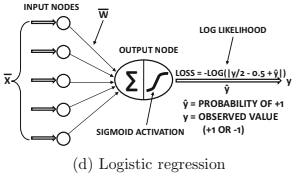

Therefore the gradient for the loss function is

$$\frac{\partial L_i}{\partial \overline{W}} = -\frac{y_i \overline{X}_i}{1 + \exp(y_i \overline{W} \cdot \overline{X}_i)} \qquad (2.16)$$

Hence, the gradient descent updates of logistic regression are:

$$ \overline{W} \impliedby \overline{W} (1 - \alpha \lambda) + \alpha \frac{y_i \overline{X}_i}{1 + \exp[y_i (\overline{W} \cdot \overline{X}_i)]} \qquad (2.17)$$

### 2.2.3.1 Alternative Choices of Activation and Loss

Yeah so you can use a different choice, which will be explored in a later chapter...

## 2.2.4 Support Vector Machines

Neural Architecture of the SVM is identical to Widrow-Hoff. The main difference is the choice of the loss function. 

The loss function (hinge-loss) for the $i^{th}$ training instance is

$$L_i = \max \{0, 1 - y_i \hat{y}_i\} \qquad (2.19)$$

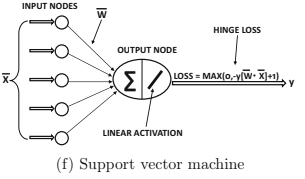

Hinge Loss makes it so that a positive training instance is only penalized for being less than 1, and a negative training instance is only penalized for being greater than −1. In both cases, the penalty is linear, and abruptly flattens out at the aforementioned thresholds. This eliminates the achilles heel which was exhibited by WH, as shown in the figure.

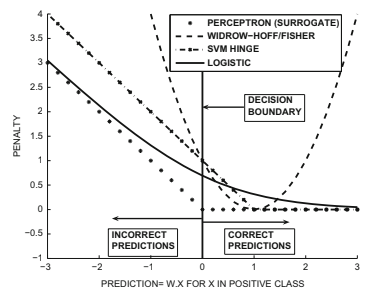

Therefore **only misclassified points or points that are too close to the decision boundary are penalized**.

The gradient therefore is

$$\frac{\partial L_i}{\partial \overline{W}} = -y_i \overline{X}_i \text{ if } y_i \hat{y}_i < 1 \quad \text{ and } 0 \text{ otherwise} \qquad (2.20)$$

If the condition is satified to be less than 1, the update is the following with the indicator function being 1 when the arg is satisifed:

$$\overline{W} \impliedby \overline{W} (1- \alpha \cdot \lambda) + \alpha y_i \overline{X}_i [I(y_i \hat{y}_i < 1)]  \qquad (2.21)$$

Therefore, a perceptron makes the update only when a point is misclassified, whereas the support vector machine also makes updates for points that are classified correctly, albeit not very confidently.

Similarites and differences of models are as tabulated:

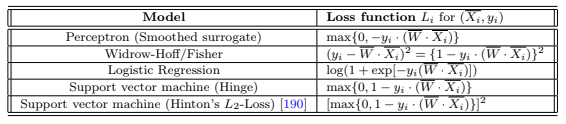

Basically this section is saying that rudimentary special cases of neural networks are instantiations of well-known algorithms in the machine learning literature.

# 2.3 Neural Architectures for Multiclass Models

Okay so Binary Classification is cool and all but what about classification with $k$ classes?

## 2.3.1 Multiclass Perceptron

Each training instance is the same, but now instead of some $y_i$, we have a class $k$ we want to be labeled within the training instance $(\overline{X}_i, c(i))$, where $c(i)$ is simply an index function of the observed class. Therefore we are going to have a bunch of weight vectors for the $k$ classes to be able to find the linear separators we want.

Notably we want to find these separators simultaneously, and then have it be the case that the value of $\overline{W}_{c(i)} \cdot \overline{X}_i$ is larger than the other values for the other classes (mathematically $\overline{W}_r \cdot \overline{X}_i$ for each $r \neq c(i)$)

Why you ask? We want to only predict one class $k$, and the training instance which does this will have the largest value of $\overline{W}_r \cdot \overline{X}_i$. So the loss function is

$$L_i = \max_{r:r \neq c(i)} \max (\overline{W}_r \cdot \overline{X}_i - \overline{W}_{c(i)} \cdot \overline{X}_i,0)$$

aka the maximum class of the max of the difference of the two dot products of the opposing training instances or zero. Mouthful!

Illustrated,

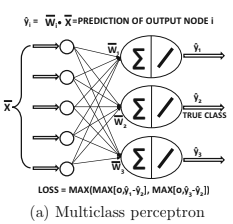

When an instance is correctly classified, again nothing happens (gradient is zero). However for a misclassified instance the gradients depend upon whether the $r^{th}$ class is equal to the indexed function class $c(i)$,

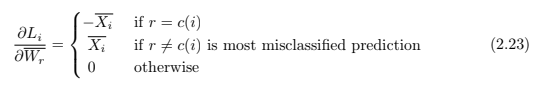

Ok, so if the correct class $r = c(i)$ receives the largest of output $\overline{W}_r \cdot \overline{X}_i$, no update is necessary (we only update on misclassified as shown previously).

**But**, an update is made for each separator $\overline{W}_r$ with learning rate $\alpha > 0$ as follows:

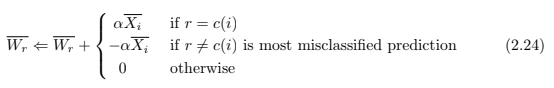

## 2.3.2 Weston-Watkins SVM

1. Updates the separator of any class that is predicted more favorably than the true class.

2. Updates the separators in cases where an incorrect class gets a prediction that is “uncomfortably close” to the true class.

Ok so everything is the same as the multiclass perceptron except for the loss function.

The loss function for the WW SVM is

$$L_i = \sum_{r:r \neq c(i)} \max (\overline{W}_r \cdot \overline{X}_i - \overline{W}_{c(i)} \cdot \overline{X}_i + 1,0) \qquad (2.25)$$

and the architecture is the same except for this loss function:

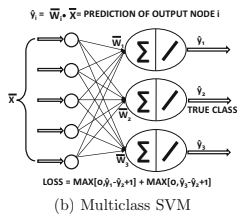

Points 1 and 2 are accomplished because for the classes that are incorrect lag by 1 behind the true class and all losses over all classes where that is the case are added.

Hence the gradient must reflect these differences, and they do when $\delta (r, \overline{X}_i)$ is a 0/1 indicator function.

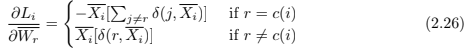

Hence the gradient descent step for the $r^{th}$ separator is:

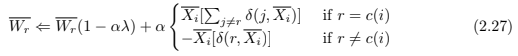

When the loss is zero for a training instance, the previous update is just simplified for each $r$ hyperplane:

$$\overline{W}_r \impliedby \overline{W}_r (1 - \alpha \lambda) \qquad (2.28)$$



## 2.3.3 Multinomial Logistic Regression (Softmax Classifier)

Multi-way generalization of logistic regression.

A little unsure on the "posterior-probability" but let's give it a go.

If we take the same ideas from the binary logistic regression, then everything should follow given this idea of the posterior probability. The estimation for this posterior is

$$P(r| \overline{X}_i) = \frac{\exp (\overline{W}_r \cdot \overline{X}_i)}{\sum_{j=1}^k \exp (\overline{W}_r \cdot \overline{X}_i)} \qquad (2.29)$$

So it is just predicting the classes but in terms of probabilites because logits want probabilities.

I understand what it's saying here but I don't get the math (316 failed me here I guess) sooo... I'll just put this in here and we can talk about it :D

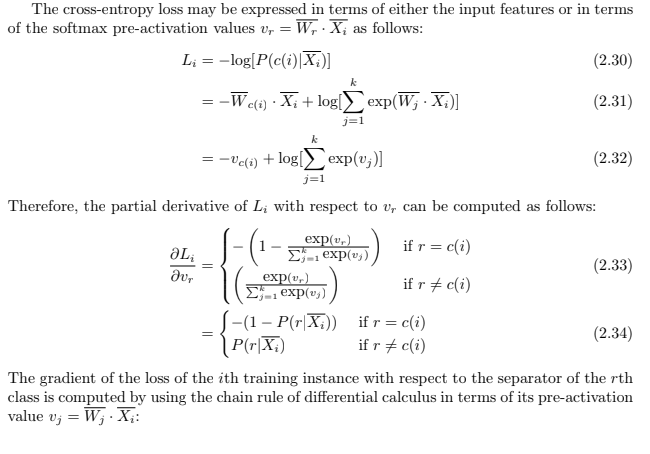

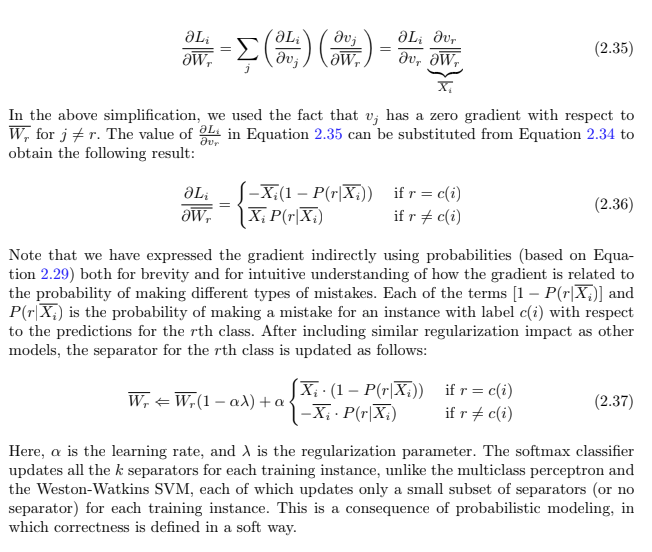




## 2.3.4 Hierarchical Softmax for Many Classes

Learning is slow with many classes with these methods (example text mining). To improve efficiency, we can group classes in a methodical way into a binary tree structure so that we can jump down the tree at a logarithimic pace, and then classify it.

If we group the classes in an intelligent way (group similar classes), then a significant speed increase can be seen.

# 2.4 Backpropagated Saliency for Interpretability and Feature Selection

To determine the features which impact the classification most, one can use backpropagation. If we can determine the sensitivity of the output on an individual feature, then we gain insight into this solution.

By identifying features with a large absolute magnitude of the sensitivity, they must be related to the classification of that training instance. 

So theoretically if we backpropagate and check sensitivty we can see the most impactful features in each instance. 

Overall, the features which exhibit the largest aggregate sensitivity over all of the training set are the most relevant features to the outputs.